# 1. Install Dependencies and Setup

In [1]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import os

In [4]:
!unzip "/content/drive/MyDrive/paper 3 siham/data/data2_OP.zip" -d "/content/drive/MyDrive/paper 3 siham/data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/paper 3 siham/data/data2_OP/1.no_cheating/90frame150.jpg  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data2_OP/1.no_cheating/90frame180.jpg  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data2_OP/1.no_cheating/90frame210.jpg  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data2_OP/1.no_cheating/90frame240.jpg  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data2_OP/1.no_cheating/90frame270.jpg  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data2_OP/1.no_cheating/90frame30.jpg  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data2_OP/1.no_cheating/90frame300.jpg  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data2_OP/1.no_cheating/90frame330.jpg  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data2_OP/1.no_cheating/90frame360.jpg  
  inflating: /content/drive/MyDrive/paper 3 siham/data/data2_OP/1.no_cheating/90frame450.jpg  


In [5]:
cd /content/drive/MyDrive/paper 3 siham/data/data2_OP

/content/drive/MyDrive/paper 3 siham/data/data2_OP


In [6]:
!pwd

/content/drive/MyDrive/paper 3 siham/data/data2_OP


# 2. Remove dodgy images

In [7]:
import cv2
import imghdr

In [17]:
data_dir = '/content/drive/MyDrive/paper 3 siham/data/data2_OP'

In [16]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [18]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/paper 3 siham/data/data2_OP')

Found 9609 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [22]:
batch = data_iterator.next()

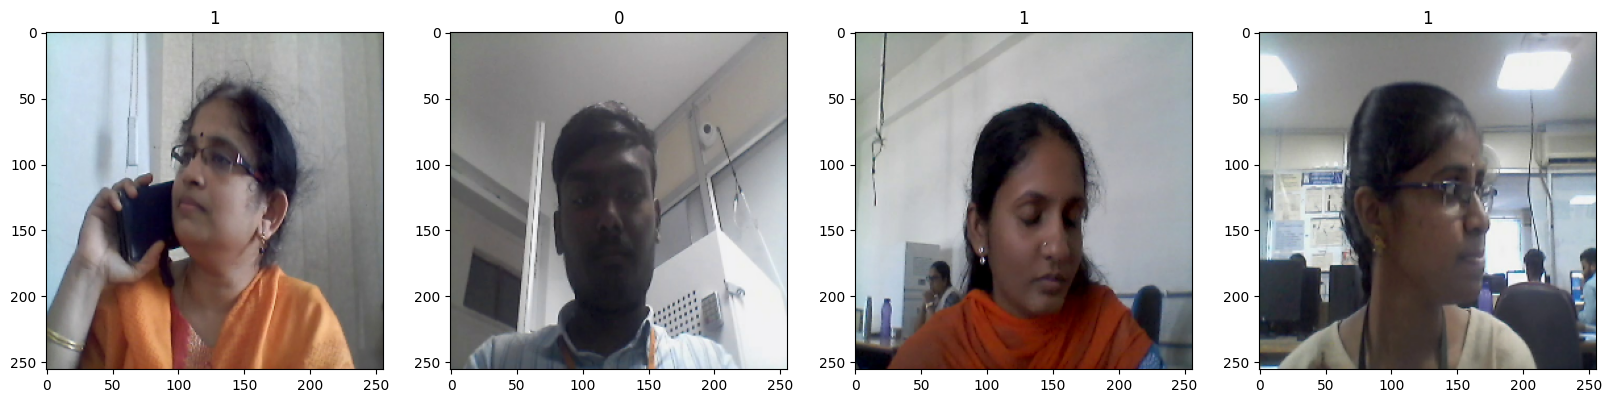

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [24]:
data = data.map(lambda x,y: (x/255, y))

In [25]:
data.as_numpy_iterator().next()

(array([[[[0.51795346, 0.73952204, 0.8856005 ],
          [0.513174  , 0.71905637, 0.8333946 ],
          [0.4595588 , 0.71188724, 0.80330884],
          ...,
          [0.6862745 , 0.7490196 , 0.74509805],
          [0.68235296, 0.74509805, 0.7411765 ],
          [0.68333334, 0.74607843, 0.74215686]],
 
         [[0.5131127 , 0.7428309 , 0.8851716 ],
          [0.5054534 , 0.72493875, 0.84068626],
          [0.48204657, 0.70980394, 0.8267157 ],
          ...,
          [0.6901961 , 0.74509805, 0.74509805],
          [0.68694854, 0.7418505 , 0.7418505 ],
          [0.68897057, 0.7438725 , 0.7438725 ]],
 
         [[0.5223652 , 0.74215686, 0.86311275],
          [0.5248774 , 0.74938726, 0.8435049 ],
          [0.5175858 , 0.71954656, 0.82751226],
          ...,
          [0.69074756, 0.7456495 , 0.7495711 ],
          [0.68780637, 0.7427083 , 0.7466299 ],
          [0.6870098 , 0.74191177, 0.74583334]],
 
         ...,
 
         [[0.33210784, 0.40582108, 0.43566176],
          [0.36182

# 5. Split Data

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [27]:
train_size

210

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [29]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.compile(optimizer= tf.keras.optimizers.RMSprop(), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 128)       0

# 7. Train

In [35]:
logdir='logs'

In [40]:
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


CALLBACKS = [
    callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience=7, verbose=1),
    callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, min_delta=0.01, min_lr=1e-10, patience=2, verbose=1, mode='auto')
]

In [42]:
import time
t1=time.time()
hist = model.fit(train, epochs=60, validation_data=val, callbacks=CALLBACKS)
t2= time.time()
temps_execution = t2 - t1
print(f"Le temps d'exécution est de {temps_execution} secondes.")

Epoch 1/60
210/210 [==============================] - 80s 337ms/step - loss: 0.4592 - accuracy: 0.7655 - val_loss: 0.2799 - val_accuracy: 0.8708 - lr: 0.0010
Epoch 2/60
210/210 [==============================] - 67s 316ms/step - loss: 0.2645 - accuracy: 0.8882 - val_loss: 0.2229 - val_accuracy: 0.9094 - lr: 0.0010
Epoch 3/60
210/210 [==============================] - 69s 325ms/step - loss: 0.2114 - accuracy: 0.9158 - val_loss: 0.1977 - val_accuracy: 0.9214 - lr: 0.0010
Epoch 4/60
210/210 [==============================] - 56s 265ms/step - loss: 0.1805 - accuracy: 0.9292 - val_loss: 0.1808 - val_accuracy: 0.9323 - lr: 0.0010
Epoch 5/60
210/210 [==============================] - 66s 311ms/step - loss: 0.1507 - accuracy: 0.9433 - val_loss: 0.1980 - val_accuracy: 0.9260 - lr: 0.0010
Epoch 6/60
210/210 [==============================] - 68s 321ms/step - loss: 0.1312 - accuracy: 0.9469 - val_loss: 0.1782 - val_accuracy: 0.9365 - lr: 0.0010
Epoch 7/60
210/210 [==============================] 

# 8. Plot Performance

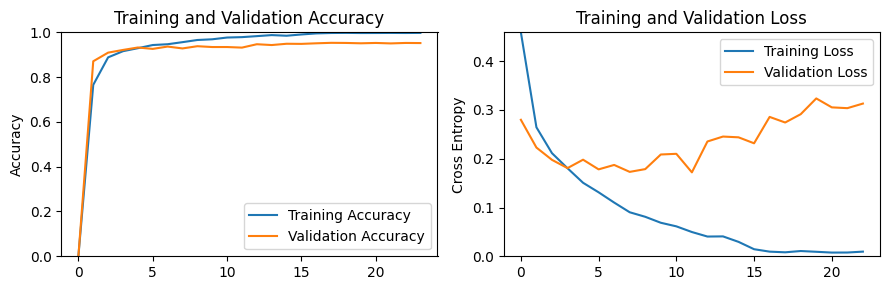

In [45]:
import matplotlib.pyplot as plt

# Assuming 'history' contains your training history

acc = [0.] + hist.history['accuracy']
val_acc = [0.] + hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a figure with two subplots in the same row
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

# Plot accuracy
ax1.plot(acc, label='Training Accuracy')
ax1.plot(val_acc, label='Validation Accuracy')
ax1.legend(loc='lower right')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([min(min(acc), min(val_acc)), 1])
ax1.set_title('Training and Validation Accuracy')

# Plot loss
ax2.plot(loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')
ax2.legend(loc='upper right')
ax2.set_ylabel('Cross Entropy')
ax2.set_ylim([0, max(max(loss), max(val_loss))])
ax2.set_title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# 9. Evaluate

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
model.evaluate(train)

210/210 [==============================] - 26s 119ms/step - loss: 0.0057 - accuracy: 0.9982


[0.005718220956623554, 0.9982143044471741]

In [48]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [49]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 31ms/step


In [50]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.951782, shape=(), dtype=float32) tf.Tensor(0.9265306, shape=(), dtype=float32) tf.Tensor(0.93854165, shape=(), dtype=float32)


In [51]:
t3=time.time()
model.evaluate(test)
t4=time.time()
temps_execution = t4- t3
print(f"Le temps d'exécution est de {temps_execution} secondes.")

30/30 [==============================] - 30s 73ms/step - loss: 0.3505 - accuracy: 0.9396
Le temps d'exécution est de 40.96355128288269 secondes.


In [52]:
model.evaluate(val)

60/60 [==============================] - 29s 132ms/step - loss: 0.3196 - accuracy: 0.9510


[0.3196425437927246, 0.9510416388511658]

In [53]:
y_pred = []  # store predicted labels
y_true = []  # store true labels
y_pred1 = []
# iterate over the dataset
for image_batch, label_batch in test:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds= model.predict(image_batch)
   # append predicted labels
   # y_pred.append(np.argmax(preds, axis = - 1))
   #y_pred.append( preds.argmax(axis = 1))
   #y_pred=rech(preds)
   y_pred=np.where(preds> 0.5, 1,0)
   y_pred1.append(y_pred)
# convert the true and predicted labels into tensors
yr= tf.concat([item for item in y_true], axis = 0)
yp = tf.concat([item for item in y_pred1], axis = 0)

1/1 [==============================] - 0s 97ms/step


In [54]:
#yr

In [55]:
#yp

In [56]:
from sklearn.metrics import classification_report

In [57]:
report = classification_report(yr,yp)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       469
           1       0.95      0.93      0.94       491

    accuracy                           0.94       960
   macro avg       0.94      0.94      0.94       960
weighted avg       0.94      0.94      0.94       960



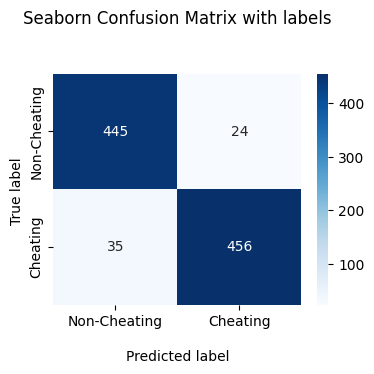

In [58]:
from sklearn.metrics import confusion_matrix
# importing library for plotting
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(4,3))
#Generate the confusion matrix
cf_matrix = confusion_matrix(yr, yp)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap=plt.cm.Blues, fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Cheating','Cheating'])
ax.yaxis.set_ticklabels(['Non-Cheating','Cheating'])

## Display the visualization of the Confusion Matrix.
plt.show()

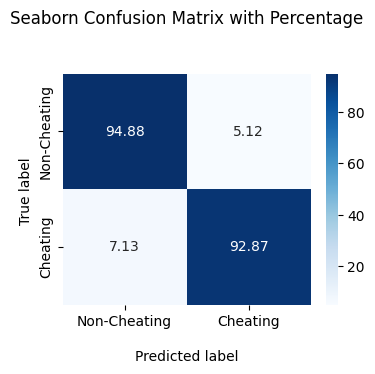

In [59]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(4,3))
# Generate the confusion matrix
cf_matrix = confusion_matrix(yr, yp)

# Calculate the percentages
cf_matrix_percent = cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Create the heatmap
ax = sns.heatmap(cf_matrix_percent, annot=True, cmap=plt.cm.Blues, fmt='.2f')

# Set the title and labels
ax.set_title('Seaborn Confusion Matrix with Percentage\n\n')
ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label ')

# Set tick labels
ax.xaxis.set_ticklabels(['Non-Cheating', 'Cheating'])
ax.yaxis.set_ticklabels(['Non-Cheating', 'Cheating'])

# Display the visualization of the Confusion Matrix with percentage
plt.show()


In [60]:
import numpy as np
from sklearn.metrics import det_curve
fpr, fnr, thresholds = det_curve(yr, yp)
print(fpr)

[1.         0.05117271]


In [61]:
import numpy as np
from sklearn.metrics import f1_score

print('f1_score=',f1_score(yr, yp, average='macro'))

f1_score= 0.938533596533399


# 10. Test

In [62]:
import cv2

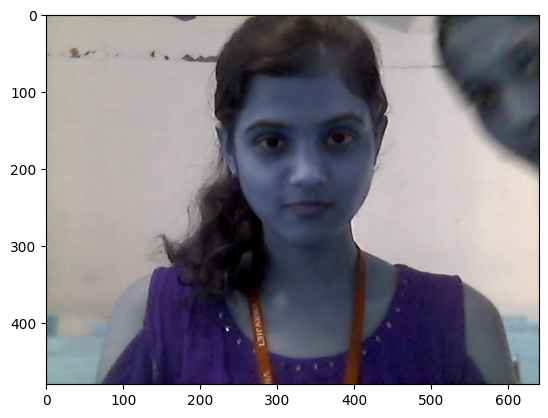

In [64]:
img = cv2.imread('/content/drive/MyDrive/paper 3 siham/data/data2_OP/2.cheating/3frame174.jpg')
plt.imshow(img)
plt.show()

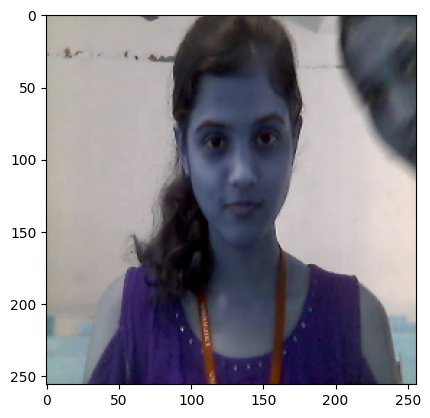

In [65]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [66]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 186ms/step


In [67]:
yhat

array([[1.]], dtype=float32)

In [68]:
if yhat > 0.5:
    print(f'Predicted class is cheating')
else:
    print(f'Predicted class is no cheating')

Predicted class is cheating


# 11. Save the Model

In [69]:
from tensorflow.keras.models import load_model

In [71]:
model.save(os.path.join('/content/drive/MyDrive/paper 3 siham/data/models','2.data2_cnn.h5'))

In [72]:
new_model = load_model('/content/drive/MyDrive/paper 3 siham/data/models/2.data2_cnn.h5')

In [73]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 138ms/step


array([[1.]], dtype=float32)

##